# 2. Reviews Preprocessing

In [1]:
import numpy as np
import pandas as pd
import textblob
import matplotlib.pyplot as plt
from multiprocessing import Pool

## 2.1 Touch and clean data

### Load review data

In [2]:
raw_reviews = pd.read_csv('../data/2018_04_14/reviews.csv')

### Show attributes

In [3]:
attributes = [(i, raw_reviews.columns[i]) for i in range(len(raw_reviews.columns))]
for j in range(len(attributes)): print(attributes[j])

(0, 'listing_id')
(1, 'id')
(2, 'date')
(3, 'reviewer_id')
(4, 'reviewer_name')
(5, 'comments')


### Prune useless attributes

In [4]:
reviews = raw_reviews.drop(['id', 'date', 'reviewer_id', 'reviewer_name'], axis=1)

## 2.2 Sentimental analysis

### Method A. Combine and compute

In [5]:
ids = list(np.unique(reviews.listing_id.tolist()))

reviews['comments'] = reviews['comments'].astype(str)
reviews = reviews.groupby(by='listing_id')['comments'].sum().reset_index()

reviews['sentiments'] = reviews.comments.apply(lambda x: textblob.TextBlob(x).sentiment)

reviews[['polarity', 'subjectivity']] = reviews.sentiments.apply(pd.Series)
reviews_a = reviews.drop(columns=['comments', 'sentiments'])

### Method B. Compute and average

In [ ]:
reviews['sentiments'] = reviews.comments.apply(lambda x: textblob.TextBlob(str(x)).sentiment)

In [ ]:
reviews[['polarity', 'subjectivity']] = reviews.sentiments.apply(pd.Series)
reviews = reviews.drop(columns=['comments', 'sentiments'])

In [ ]:
cmb_listing_id = reviews.groupby(['listing_id'])['listing_id'].mean()
cmb_polarity = reviews.groupby(['listing_id'])['polarity'].mean()
cmb_subjectivity = reviews.groupby(['listing_id'])['subjectivity'].mean()

In [86]:
reviews_b = pd.DataFrame(data = [[cmb_listing_id.iloc[i], cmb_polarity.iloc[i], cmb_subjectivity.iloc[i]] for i in range(len(cmb_polarity))], columns = ['listing_id', 'polarity', 'subjectivity'])

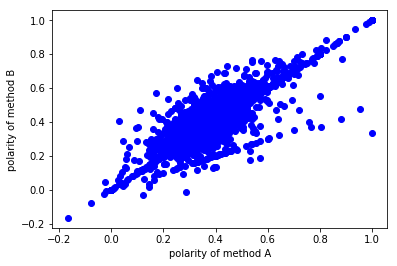

In [105]:
plt.figure()
plt.plot(reviews_a['polarity'], reviews_b['polarity'], 'bo')
plt.xlabel('polarity of method A')
plt.ylabel('polarity of method B')
plt.show()

## 2.3 Save reviews

In [106]:
reviews_b.to_csv('../save/reviews.csv')